# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

## First, import relevant Python libraries, initialize magic commands, and read the main dataset

In [2]:
%matplotlib notebook
import datetime as dt
import numpy as np
import matplotlib.dates as mdates

In [3]:
# Read the main (the only) dataset
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [4]:
# remove Feb 29th for all years
df_copy = df
df_copy = df_copy[~df_copy['Date'].str.contains('-02-29')]
#len(df_copy)

<IPython.core.display.Javascript object>


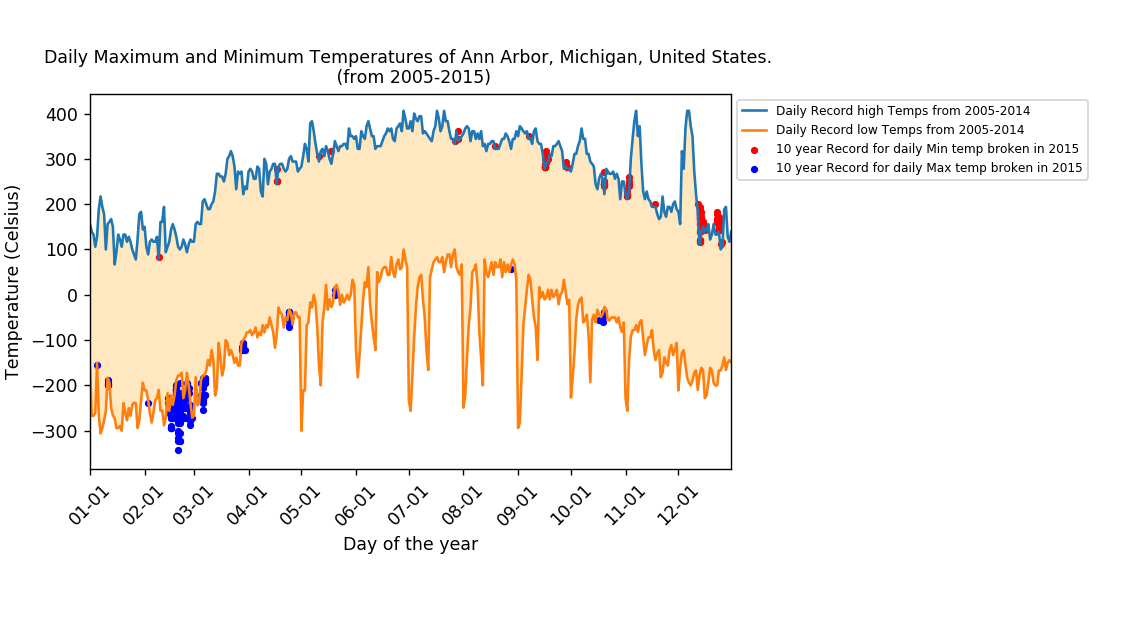

In [5]:
# Create figure and axes and increase figure size
fig, ax = plt.subplots(figsize=(9,5))

# two line graphs for 2005-2014
groupby_element = df_copy.groupby('Element')
for value, data in groupby_element:
    unique_days = list(df_copy['Date'].str[5:].unique())
    x_values = list(map(lambda x: pd.to_datetime(x, format = '%m-%d'), unique_days))
    if value == 'TMAX':
        y_values_tmax = list(map(lambda x: df_copy[(df_copy['Date'].str.contains(x)) & ~(df_copy['Date'].str.contains('2015'))]
                            ['Data_Value'].max(), unique_days))
        x_values, y_values_tmax = zip(*sorted(zip(x_values, y_values_tmax)))
        plt.plot(x_values, y_values_tmax, '-', label = 'Daily Record high Temps from 2005-2014') #(2005-2014 line graph TMAX)
    if value == 'TMIN':
        y_values_tmin = list(map(lambda x: df_copy[(df_copy['Date'].str.contains(x)) & ~(df_copy['Date'].str.contains('2015'))]
                            ['Data_Value'].min(), unique_days))
        x_values, y_values_tmin = zip(*sorted(zip(x_values, y_values_tmin)))
        plt.plot(x_values, y_values_tmin, '-', label = 'Daily Record low Temps from 2005-2014') #(2005-2014 line graph TMIN)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.set_xlim(left = dt.date(1900, 1, 1), right = dt.date(1900, 12, 31))

# shade the space between TMAX and TMIN of each day
ax.fill_between(x_values, y_values_tmax, y_values_tmin, facecolor='orange', alpha=0.25)

In [6]:
# Scatterplot of datapoints for temperatures exceeding daily record max temperatures(from datapoints of 2005-2014)
df_copy_2015 = df_copy[df_copy['Date'].str.contains('2015')]

tmax_data = list(zip(sorted(unique_days), y_values_tmax))

higher_temp_data_2015 = []
for data_point in tmax_data:
    record_df = df_copy_2015[(df_copy_2015['Date'].str.contains(data_point[0])) & (df_copy_2015['Data_Value'] > data_point[1])]
    to_be_appended = list(zip(record_df['Date'], record_df['Data_Value']))
    higher_temp_data_2015.extend(to_be_appended)
higher_temp_data_2015 = [(x[0][5:], x[1]) for x in higher_temp_data_2015]
# unpack higher_temp_data_2015 into two lists based on the two arguments of the elements of this list
list1, list2 = zip(*higher_temp_data_2015)
list1 = list(map(lambda x: pd.to_datetime(x, format = '%m-%d'), list1))
# scatter plot for datapoints: list1, list 2
plt.scatter(list1, list2, s = 10, c = 'red', label = '10 year Record for daily Min temp broken in 2015')

In [7]:
# Scatterplot of datapoints for temperatures below daily record min temperatures(from datapoints of 2005-2014)
df_copy_2015 = df_copy[df_copy['Date'].str.contains('2015')]

tmin_data = list(zip(sorted(unique_days), y_values_tmin))

lower_temp_data_2015 = []
for data_point in tmin_data:
    record_df = df_copy_2015[(df_copy_2015['Date'].str.contains(data_point[0])) & (df_copy_2015['Data_Value'] < data_point[1])]
    to_be_appended = list(zip(record_df['Date'], record_df['Data_Value']))
    lower_temp_data_2015.extend(to_be_appended)
lower_temp_data_2015 = [(x[0][5:], x[1]) for x in lower_temp_data_2015]
# unpack lower_temp_data_2015 into two lists based on the two arguments of the elements of this list
list1, list2 = zip(*lower_temp_data_2015)
list1 = list(map(lambda x: pd.to_datetime(x, format = '%m-%d'), list1))
# scatter plot for datapoints: list1, list 2
plt.scatter(list1, list2, s = 10, c = 'blue', label = '10 year Record for daily Max temp broken in 2015')

In [19]:
# Make the Visuals nice!

# rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(top = 0.85, bottom=0.25, left = 0.08, right = 0.65)

# Add the legend for record high and record low temperatures (TMAX and TMIN) 
plt.xlabel('Day of the year')
plt.ylabel('Temperature (Celsius)')
plt.title('Daily Maximum and Minimum Temperatures of Ann Arbor, Michigan, United States. \n (from 2005-2015)', fontsize = 10)
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend()
# Place legend outside of axes
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 7})

In [20]:
#save image
plt.savefig('assignment2_specialization_second.pdf')